<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/Nhan%20Dien%20Mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/FACE_TRAIN',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/FACE_TRAIN',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_generator, epochs=50, validation_data=val_generator)
model.save('/content/drive/MyDrive/FACE_TRAIN.h5')
print(" Đã lưu mô hình thành công.")

Found 12 images belonging to 3 classes.
Found 2 images belonging to 3 classes.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.0645 - val_accuracy: 0.0000e+00 - val_loss: 3.7228
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 3.1187 - val_accuracy: 1.0000 - val_loss: 0.4062
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4167 - loss: 2.8494 - val_accuracy: 0.5000 - val_loss: 1.1235
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5833 - loss: 2.1645 - val_accuracy: 0.0000e+00 - val_loss: 1.3866
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4167 - loss: 1.5889 - val_accuracy: 0.5000 - val_loss: 1.2793
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6667 - loss: 0.5399 - val_accuracy: 0.5000 - val_loss: 0.6258
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7500 - loss: 0.3775 - val_accuracy: 0.5000 - val_loss: 0.5913
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━

 Đã lưu mô hình thành công.


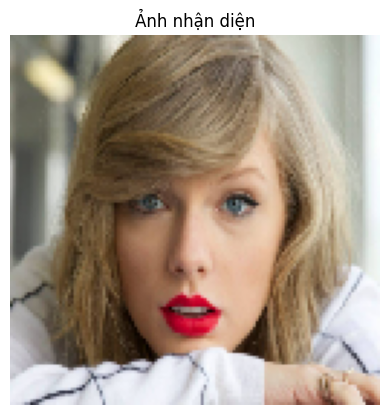

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Nhận diện là: Ja


In [ ]:
from tensorflow.keras.models import load_model
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/FACE_TRAIN.h5'
model = load_model(model_path)
image_path = "/Ảnh chụp màn hình 2025-04-12 005235.png"
img = load_img(image_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.title("Ảnh nhận diện")
plt.show()
img_array = img_to_array(img)
img_array = img_array.reshape(1, 128, 128, 3)
img_array = img_array / 255.0
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
class_labels = {
    0: "Ja",
    1: "Mai",
    2: "Tet"

}
person_name = class_labels.get(predicted_class, "Unknown")
print(f"Nhận diện là: {person_name}")